The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight
tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous
value to passengers. Applying EDA, statistical methods and Machine learning algorithms in order to get
meaningful information from it.

In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
# Looking at the data and removing unnecessary column from the dataframe  
df = pd.read_csv("Flight_Booking.csv")
df = df.drop(columns=["Unnamed: 0"])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [27]:
# Checking the shape of the dataframe and datatypes of all columns along with calculating the statistical data
df.shape


(300153, 11)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [50]:
df.describe(include='all')

,airline,flight,source_city,departure_time,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
unique,NaN,1561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,UK-706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.104873,NaN,2.577592,2.417337,3.074086,2.588303,0.688536,12.221021,26.004751,20889.660523
std,1.833265,NaN,1.751762,1.754276,1.741666,1.744543,0.463093,7.191997,13.561004,22697.767366
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,NaN,1.000000,1.000000,2.000000,1.000000,0.000000,6.830000,15.000000,4783.000000
50%,3.000000,NaN,2.000000,2.000000,4.000000,3.000000,1.000000,11.250000,26.000000,7425.000000
75%,5.000000,NaN,4.000000,4.000000,5.000000,4.000000,1.000000,16.170000,38.000000,42521.000000


In [30]:
# Checking out the missing values in the dataframe
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

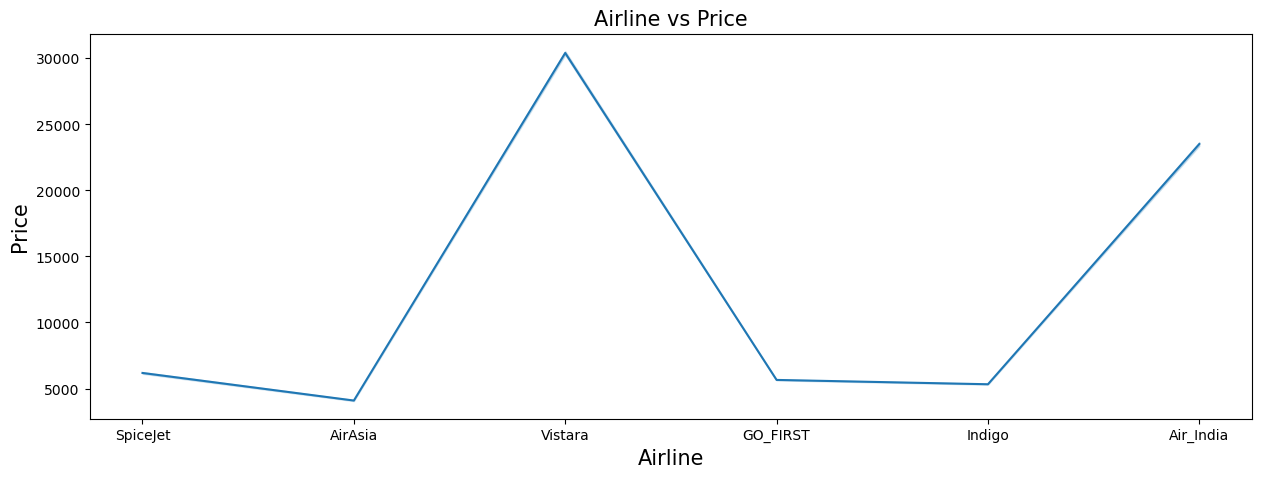

In [31]:
plt.figure(figsize = (15,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('Airline vs Price',fontsize =15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

There is a variation in price with different airlines


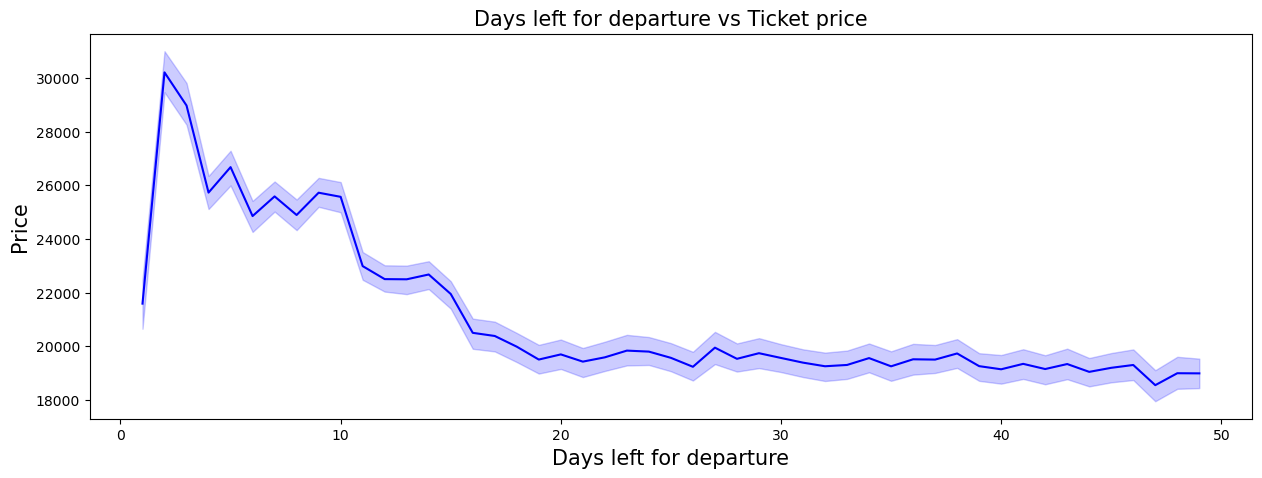

In [32]:
plt.figure(figsize = (15,5))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days left for departure vs Ticket price',fontsize =15)
plt.xlabel('Days left for departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

The price of the ticket increases as the days left for departure decreases 

<AxesSubplot:xlabel='airline', ylabel='price'>

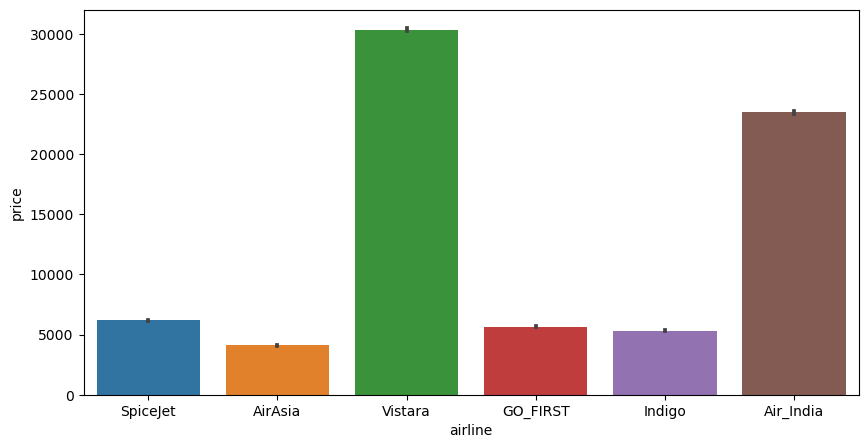

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x='airline',y='price',data=df)

Price range of all the flights 

<AxesSubplot:xlabel='class', ylabel='price'>

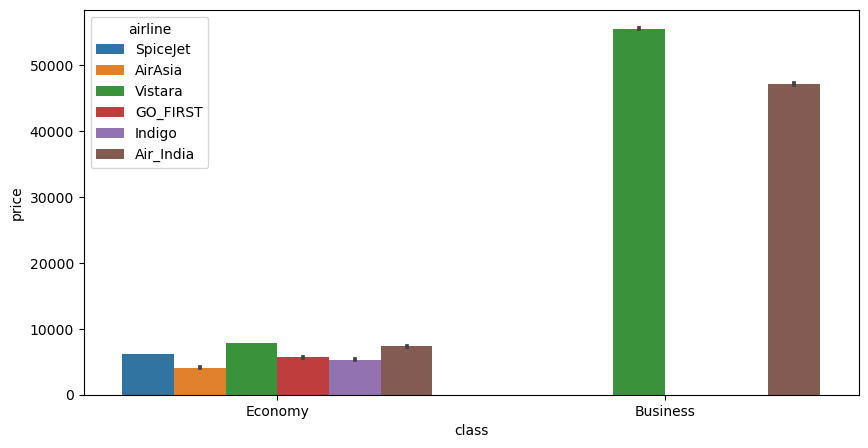

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x='class',y='price',data=df,hue='airline')

Range of price of all the flights of Economy and Business class

<AxesSubplot:xlabel='days_left', ylabel='price'>

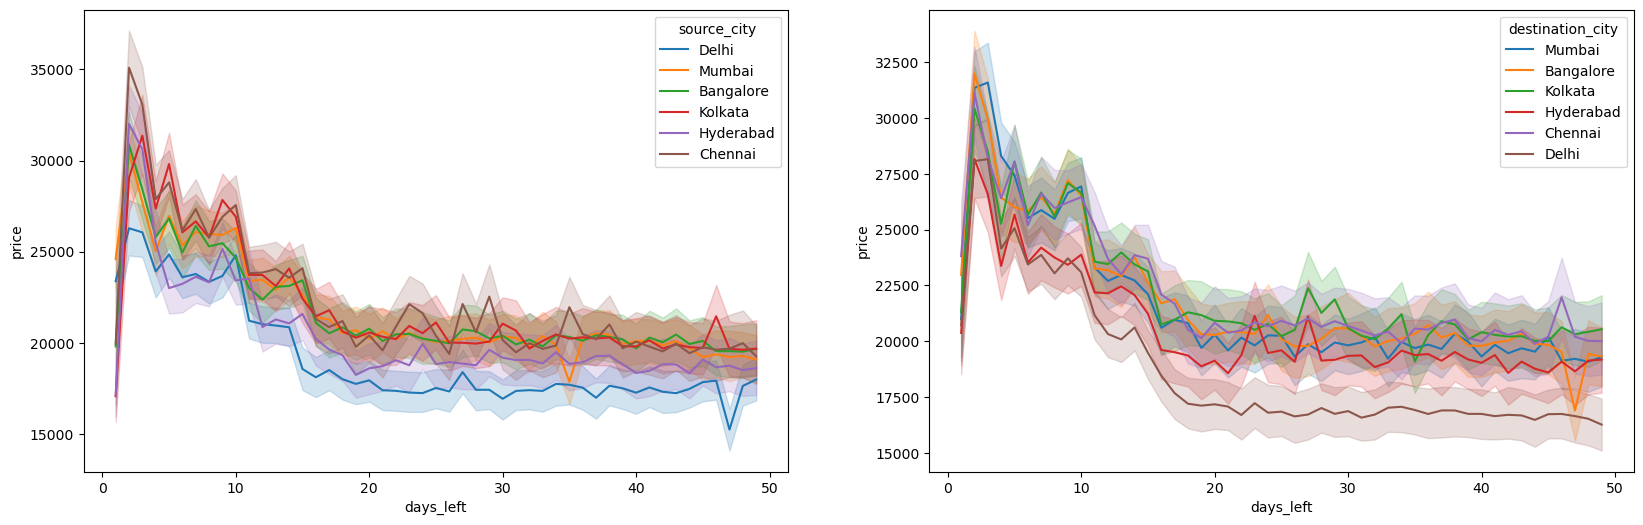

In [35]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(data=df,x='days_left',y='price',hue='source_city',ax=ax[0])
sns.lineplot(data=df,x='days_left',y='price',hue='destination_city',ax=ax[1])


Range of price of flights with source and destination city according to the days left 

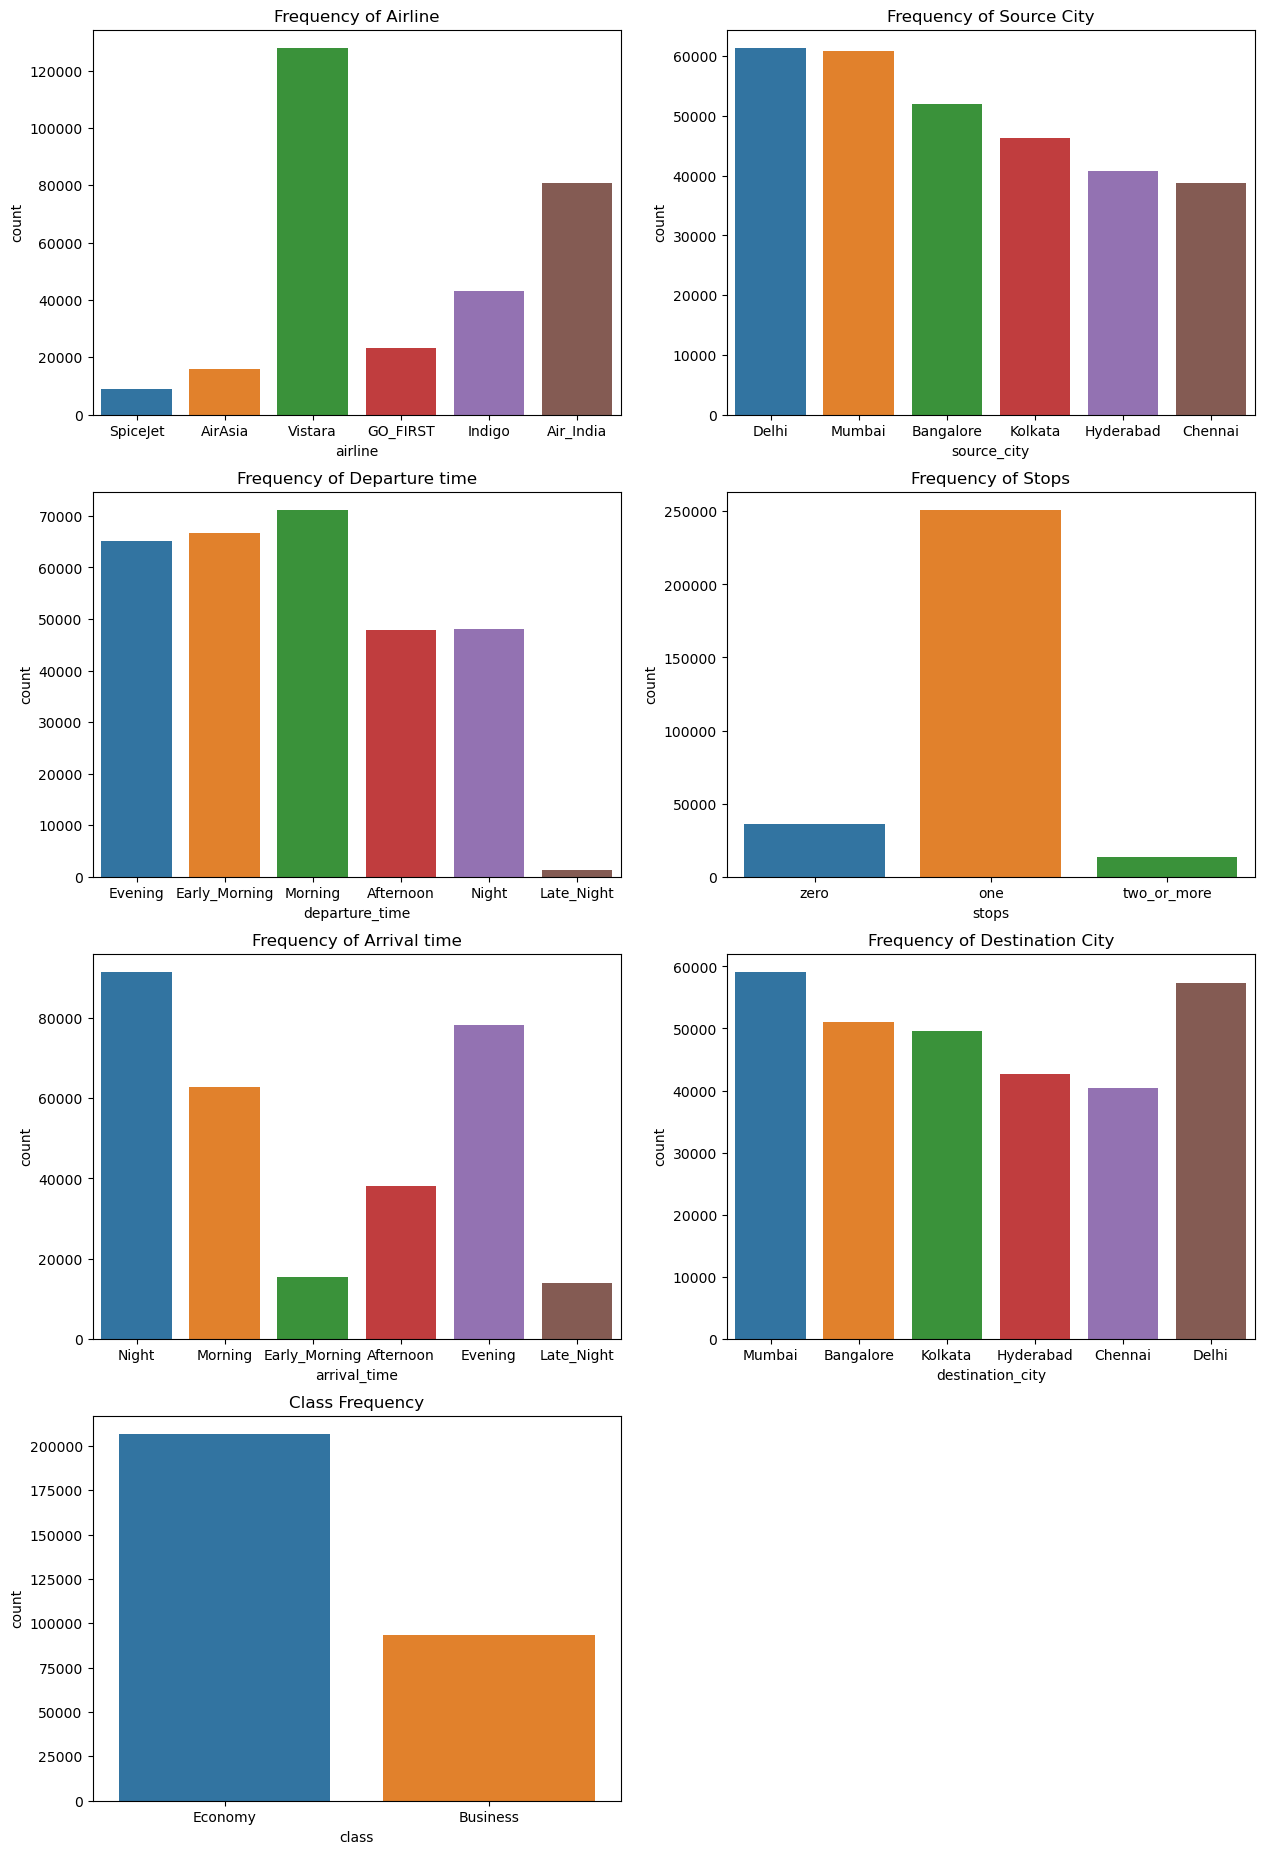

In [36]:
# Visualization of categorical features with countplot
plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'],data=df)
plt.title('Frequency of Airline')

plt.subplot(4,2,2)
sns.countplot(x=df['source_city'],data=df)
plt.title('Frequency of Source City')

plt.subplot(4,2,3)
sns.countplot(x=df['departure_time'],data=df)
plt.title('Frequency of Departure time')

plt.subplot(4,2,4)
sns.countplot(x=df['stops'],data=df)
plt.title('Frequency of Stops')

plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'],data=df)
plt.title('Frequency of Arrival time')

plt.subplot(4,2,6)
sns.countplot(x=df['destination_city'],data=df)
plt.title('Frequency of Destination City')

plt.subplot(4,2,7)
sns.countplot(x=df['class'],data=df)
plt.title('Class Frequency')

plt.show()

In [37]:
# Performing One Hot Encoding for categorical features in the dataframe 

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['airline'] = le.fit_transform(df['airline'])
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['stops'] = le.fit_transform(df['stops'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


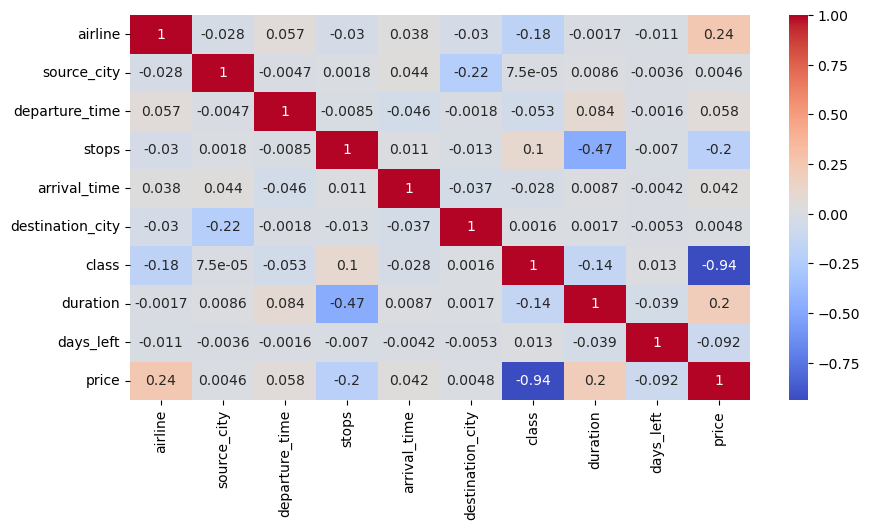

In [39]:
# plotting the correlation graph to see the correlation between features and dependent variable 

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()


In [45]:
# selecting the features using VIF . VIF should be less than 5 thus dropping the features.

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           features       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [46]:
df=df.drop(columns=['stops'])

# selecting the features using VIF . VIF should be less than 5 thus dropping the features.

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           features       VIF
0           airline  3.370020
1       source_city  2.895803
2    departure_time  2.746255
3      arrival_time  3.632792
4  destination_city  2.857808
5             class  2.776721
6          duration  3.429344
7         days_left  3.950132


In [62]:
# Applying standarization implementing Linear Regression Model to predict the price of a flight

X = df.drop(columns=['price','flight'])
y = df['price']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



In [61]:
#Implementing Linear Regression Model to predict the price of a flight

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
difference = pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual_Value','Predicted_Value'])
difference

,Actual_Value,Predicted_Value
0,7366.0,4673.755319
1,64831.0,51713.744720
2,6195.0,6610.897658
3,60160.0,55489.844234
4,6578.0,5120.342596
...,...,...
60026,5026.0,4960.777767
60027,3001.0,4693.865426
60028,6734.0,4974.962678
60029,5082.0,2729.650066


In [53]:
#Calculating r2 score

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.897752737512321

In [55]:
#Calculating MAE

from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)


4468.426673542135

In [56]:
#Calculating MAPE

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.347658046106824

In [58]:
#Calculating MSE

metrics.mean_squared_error(y_test,y_pred)

52706651.33334208

In [59]:
#Calculating RMSE

np.sqrt(metrics.mean_squared_error(y_test,y_pred))

7259.934664536733

Root Mean square error(RMSE)
of the Linear regression model is 7259.93 and Mean absolute percentage
error(MAPE) is 34 percent. Lower the RMSE and MAPE better the model

E:\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


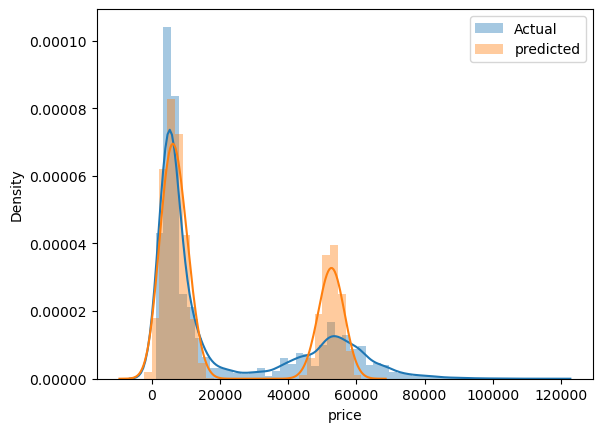

In [60]:
# plotting the graph of actual & predicted price of flight

sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='predicted')
plt.legend()

In [63]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)


In [64]:
#Calculating r2 score

r2_score(y_test,y_pred)

0.9746417923990159

In [65]:
#Calculating MAE

metrics.mean_absolute_error(y_test,y_pred)

1217.5006635460568

In [69]:
#Calculating  MAPE

mean_absolute_percentage_error(y_test,y_pred)*100

7.727373627074511

In [67]:
#Calculating  MSE

metrics.mean_squared_error(y_test,y_pred)

13071706.507786717

In [68]:
#Calculating RMSE

np.sqrt(metrics.mean_squared_error(y_test,y_pred))

3615.4815042794394

Mean absolute percentage error is 7.7 percent and RMSE
is 3615 which is less than the linear regression model

E:\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


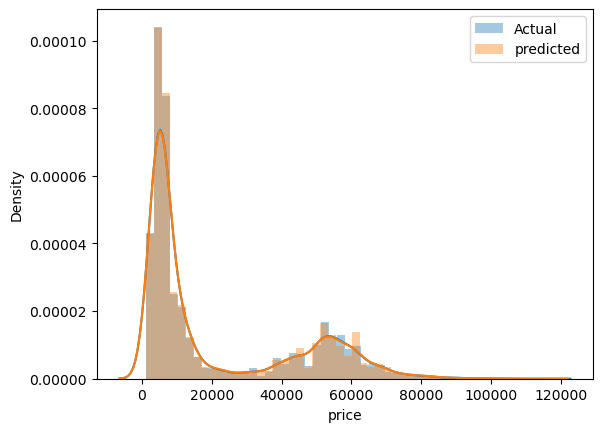

In [70]:
# plotting the graph of actual & predicted price of flight

sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='predicted')
plt.legend()

In [71]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)


In [72]:
#Calculating r2 score

r2_score(y_test,y_pred)

0.9844781340179732

In [73]:
#Calculating MAE

metrics.mean_absolute_error(y_test,y_pred)

1125.4631773828892

In [79]:
#Calculating  MAPE

mean_absolute_percentage_error(y_test,y_pred)*100

7.338490572718142

In [75]:
#Calculating  MSE

metrics.mean_squared_error(y_test,y_pred)

8001246.766446517

In [76]:
#Calculating RMSE

np.sqrt(metrics.mean_squared_error(y_test,y_pred))

2828.647515412006

Mean absolute percentage error is 7.3 percent and RMSE
is 2824 which is less than the linear regression and decision
tree model

E:\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


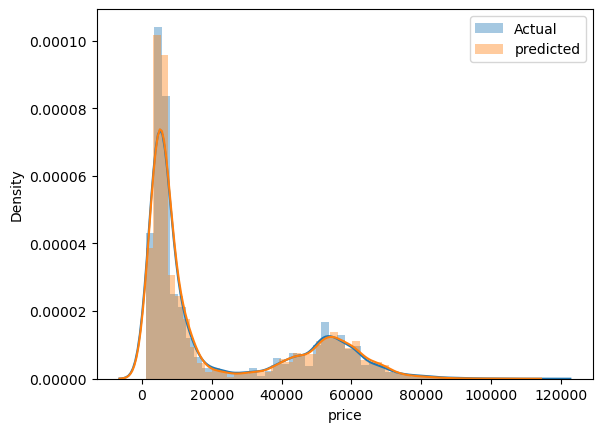

In [80]:
# plotting the graph of actual & predicted price of flight

sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='predicted')
plt.legend()